In [1]:
! pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
dataset_dir = "C:\\Users\\aksha\\OneDrive\\Desktop\\AgriMitra\\datasets prep\\PlantVillage"  # Replace with the actual path

In [4]:
# Set image size and batch size
img_size = (128, 128)  # You can change this according to your preference
batch_size = 32

In [5]:
# ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values between 0 and 1
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Randomly shear images
    zoom_range=0.2,           # Randomly zoom in on images
    horizontal_flip=True,     # Randomly flip images horizontally
    validation_split=0.2      # Use 20% of data for validation
)

In [6]:
# Train and validation data generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',   # Use 'categorical' for multi-class classification
    subset='training'
)

Found 12978 images belonging to 13 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 3239 images belonging to 13 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()

c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         6,669 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,945,485 (49.38 MB)

 Trainable params: 12,945,485 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    loss='categorical_crossentropy',  # For multi-class classification
    optimizer='adam',  # Adam optimizer
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # You can increase this for better performance
)


Epoch 1/10


c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


405/405 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.2599 - loss: 2.1784 - val_accuracy: 0.6176 - val_loss: 1.1043
Epoch 2/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.4375 - loss: 1.5839 - val_accuracy: 0.5714 - val_loss: 1.3578
Epoch 3/10


c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


405/405 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.6084 - loss: 1.1403 - val_accuracy: 0.7098 - val_loss: 0.8266
Epoch 4/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 243us/step - accuracy: 0.7188 - loss: 0.9279 - val_accuracy: 1.0000 - val_loss: 0.2715
Epoch 5/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 344s 846ms/step - accuracy: 0.6994 - loss: 0.8708 - val_accuracy: 0.7478 - val_loss: 0.7425
Epoch 6/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.5312 - loss: 1.3766 - val_accuracy: 0.8571 - val_loss: 0.6026
Epoch 7/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 629s 2s/step - accuracy: 0.7314 - loss: 0.7746 - val_accuracy: 0.8184 - val_loss: 0.5589
Epoch 8/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - accuracy: 0.9062 - loss: 0.4594 - val_accuracy: 0.8571 - val_loss: 0.2812
Epoch 9/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 806s 2s/step - accuracy: 0.7821 - loss: 0.6257 - val_accuracy: 0.8304 - val_loss: 0.5351
Epoch 10/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.7188 - loss: 0.8522 - val_accura

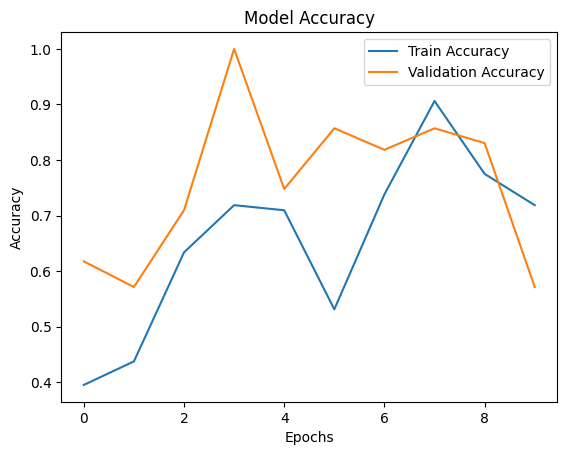

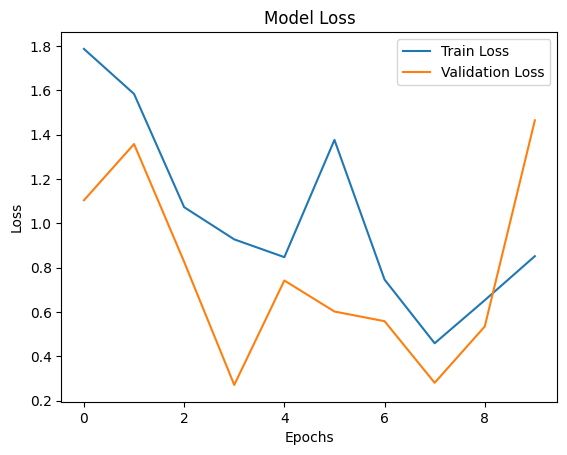

In [14]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
# Example evaluation
loss, accuracy = model.evaluate(validation_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


102/102 ━━━━━━━━━━━━━━━━━━━━ 85s 835ms/step - accuracy: 0.8135 - loss: 0.5348
Test Loss: 0.5215818285942078
Test Accuracy: 0.8212411403656006


In [16]:
# Save the trained model
model.save('crop_disease_model.keras')  # Native Keras format
